# I Libraries & Data Retrieve

In [ ]:
#I Libraries & data
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
import logging
import yfinance as yf
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')
yf.utils.progress_bar = False
logging.getLogger("yfinance").setLevel(logging.CRITICAL)

%matplotlib inline

from datetime import datetime
today = datetime.today().strftime("%Y-%m-%d")
data= yf.download("^GSPC", start="2023-01-01", end=today, interval="1d")

test = 10

# II Exploratory Data Analysis

In [14]:
#II Exploratory Data Analysis
#Overall Statistics
print(data.head(10)) 
print(data.tail(10))

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2023-01-03  3824.139893  3878.459961  3794.330078  3853.290039  3959140000
2023-01-04  3852.969971  3873.159912  3815.770020  3840.360107  4414080000
2023-01-05  3808.100098  3839.739990  3802.419922  3839.739990  3893450000
2023-01-06  3895.080078  3906.189941  3809.560059  3823.370117  3923560000
2023-01-09  3892.090088  3950.570068  3890.419922  3910.820068  4311770000
2023-01-10  3919.250000  3919.830078  3877.290039  3888.570068  3851030000
2023-01-11  3969.610107  3970.070068  3928.540039  3932.350098  4303360000
2023-01-12  3983.169922  3997.760010  3937.560059  3977.570068  4440260000
2023-01-13  3999.090088  4003.949951  3947.669922  3960.600098  3939700000
2023-01-17  3990.969971  4015.389893  3984.570068  3999.280029  4235560000
Price             Close  

In [15]:
print(data.shape) #size of data
print(data.dtypes) #types of columns


(690, 5)
Price   Ticker
Close   ^GSPC     float64
High    ^GSPC     float64
Low     ^GSPC     float64
Open    ^GSPC     float64
Volume  ^GSPC       int64
dtype: object


In [16]:
print(data.isnull().sum()) #counter of n/a values

Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


In [17]:
print(data.describe()) #basic statistics

Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count    690.000000   690.000000   690.000000   690.000000  6.900000e+02
mean    5177.864143  5201.787959  5148.945808  5175.750934  4.275058e+09
std      786.649012   787.903519   784.293126   787.242002  9.808262e+08
min     3808.100098  3839.739990  3794.330078  3823.370117  0.000000e+00
25%     4433.984985  4449.875122  4407.694946  4433.010010  3.682328e+09
50%     5237.754883  5262.525146  5208.675049  5237.780029  4.035550e+09
75%     5853.285034  5887.377563  5829.559814  5858.907471  4.668862e+09
max     6715.350098  6731.939941  6693.229980  6731.310059  9.489600e+09


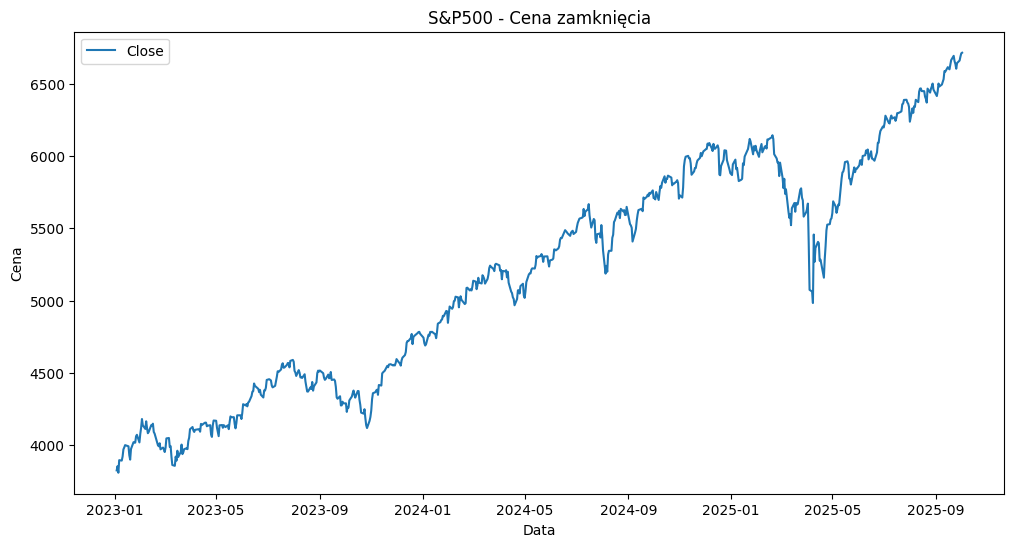

In [18]:
#II Data Vizualization
#Close Column Vizualization
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close')
plt.title("S&P500 - Cena zamknięcia")
plt.xlabel("Data")
plt.ylabel("Cena")
plt.legend()
plt.show()

# III Feature Engineering

In [19]:
#III Feature Engineering
#Lagged Values for Autoregression
n_lags = 5
#This code creates 5 new columns, each representing a lagged version of the closing price
for i in range(1, n_lags+1):
    data[f'lag{i}'] = data['Close'].shift(i)

data = data.dropna()
print(data.head(5))
print(data.columns)


Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2023-01-10  3919.250000  3919.830078  3877.290039  3888.570068  3851030000   
2023-01-11  3969.610107  3970.070068  3928.540039  3932.350098  4303360000   
2023-01-12  3983.169922  3997.760010  3937.560059  3977.570068  4440260000   
2023-01-13  3999.090088  4003.949951  3947.669922  3960.600098  3939700000   
2023-01-17  3990.969971  4015.389893  3984.570068  3999.280029  4235560000   

Price              lag1         lag2         lag3         lag4         lag5  
Ticker                                                                       
Date                                                                         
2023-01-10  3892.090088  3895.080078  3808.100098  3852.969971  3824.139893  
2023-01-11  3919.250000  3892.090088  3895.080078  3808.100098 

# IV Data Modelling

The goal of this project is to test and compare several machine learning models for predicting a continuous variable, such as the S&P500 index. 
In the data modeling phase, we will:

- Prepare the dataset by creating lag features from historical closing prices.
- Split the data into training and testing sets, keeping the chronological order to respect the time series structure.
- Train and evaluate multiple regression models, including Linear Regression, Random Forest, and Gradient Boosting.
- Compare model performance using metrics such as RMSE and MAE.
- Visualize predicted vs. actual closing prices to better understand model accuracy and behavior.

This approach will help us identify which models are most suitable for forecasting future S&P500 prices based on past trends.

## Train-Test Split

We split the dataset into training and testing sets to evaluate our models properly. 
`train_size = int(len(data) * 0.8)` calculates the number of rows representing 80% of the dataset, 
which we use for training. The remaining 20% is used for testing. 

This way, we maintain the chronological order of the data, which is crucial when predicting 
time series like S&P500 closing prices.

In [20]:
#Features: input/exogenous variables
X = data[['lag1','lag2','lag3', 'lag4','lag5']] 
#Features: output/endogenous variables
Y = data['Close'] #output/endogenous

print(X.head(5))
print(Y.head(5))

#data split
train_size = int(len(data) * 0.8) #calculates numbers of rows that are required for the train df

X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]


Price              lag1         lag2         lag3         lag4         lag5
Ticker                                                                     
Date                                                                       
2023-01-10  3892.090088  3895.080078  3808.100098  3852.969971  3824.139893
2023-01-11  3919.250000  3892.090088  3895.080078  3808.100098  3852.969971
2023-01-12  3969.610107  3919.250000  3892.090088  3895.080078  3808.100098
2023-01-13  3983.169922  3969.610107  3919.250000  3892.090088  3895.080078
2023-01-17  3999.090088  3983.169922  3969.610107  3919.250000  3892.090088
Ticker            ^GSPC
Date                   
2023-01-10  3919.250000
2023-01-11  3969.610107
2023-01-12  3983.169922
2023-01-13  3999.090088
2023-01-17  3990.969971


# Linear Regression Model
This linear regression model uses 5 lagged values of the S&P500 closing price as explanatory variables to predict the next day’s closing price. The series exhibits strong autocorrelation, meaning current prices are highly dependent on previous values, which the model leverages for short-term trend prediction. Because the model relies solely on past prices, its forecasts tend to lag behind the market: it follows trends rather than anticipates turning points. This means it performs well during long, sustained trends—such as a prolonged bull or bear market—but can generate losses when the market is highly volatile or frequently changes direction. While the model can capture general price movements, the lagged variables are highly correlated with each other, resulting in multicollinearity that makes individual coefficients unstable and difficult to interpret. Overall, the model is parametric, assumes linear relationships, and is most suitable for tracking short-term trends rather than predicting sudden market reversals. 

X_train_statistics:
Price          lag1         lag2         lag3         lag4         lag5
Ticker                                                                 
count    548.000000   548.000000   548.000000   548.000000   548.000000
mean    4964.221660  4960.973412  4957.632463  4954.587664  4951.348321
std      690.713221   691.548967   692.689202   693.872182   694.999592
min     3855.760010  3855.760010  3808.100098  3808.100098  3808.100098
25%     4356.082642  4349.289917  4348.085083  4345.245117  4338.557617
50%     4978.654785  4971.369873  4962.919922  4956.419922  4953.699951
75%     5592.015015  5589.192505  5585.472534  5585.472534  5578.869995
max     6144.149902  6144.149902  6144.149902  6144.149902  6144.149902


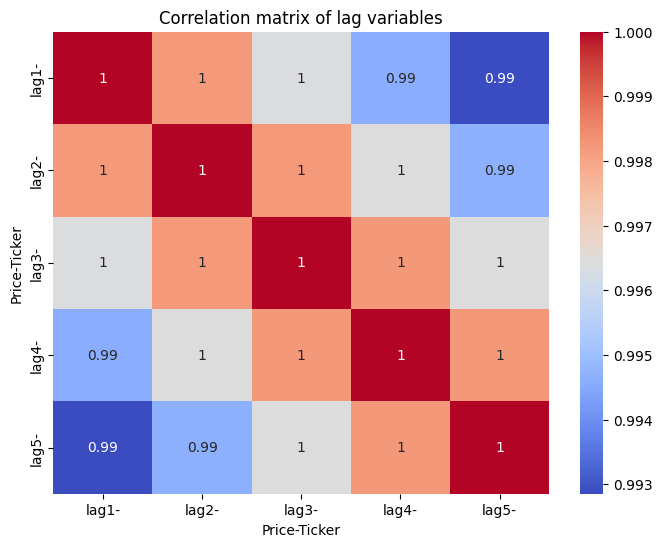

Autocorrelation lag 1: 0.9847526762668763
Autocorrelation lag 2: 0.972063165018614
Autocorrelation lag 3: 0.955000917215972
Autocorrelation lag 4: 0.9460048443296718
Autocorrelation lag 5: 0.9389251421392845


In [21]:
#0 a: Testing variables in Linear Regression as Parametric Method

print("X_train_statistics:")
print(X_train.describe())

#0 b: Check correlation between lag variables
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix of lag variables")
plt.show()


#Autocorrelation Test
y_test_arr = Y_test.values.flatten()  # konwertujemy na 1D array

print("Autocorrelation lag 1:", pd.Series(y_test_arr).autocorr(lag=1))
print("Autocorrelation lag 2:", pd.Series(y_test_arr).autocorr(lag=2))
print("Autocorrelation lag 3:", pd.Series(y_test_arr).autocorr(lag=3))
print("Autocorrelation lag 4:", pd.Series(y_test_arr).autocorr(lag=4))
print("Autocorrelation lag 5:", pd.Series(y_test_arr).autocorr(lag=5))


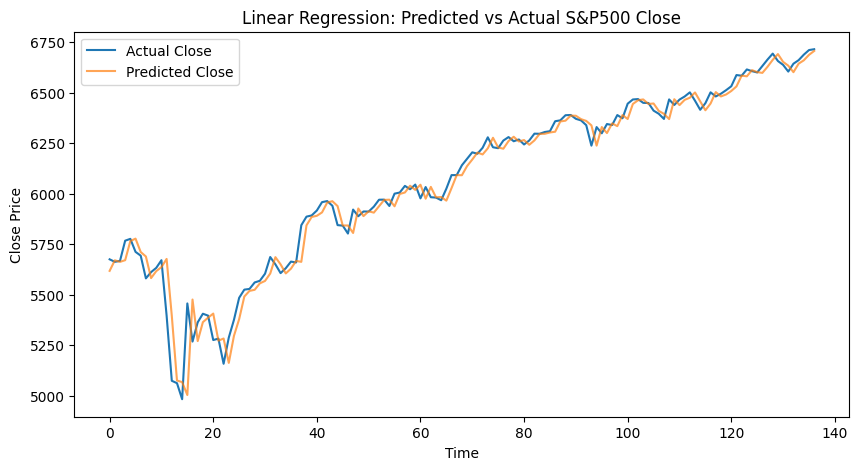

Linear Regression RMSE: 73.65173780594728
Linear Regression MAE: 44.34136626895408
Direction Accuracy: 0.53
Cumulative Return: -5.81%


In [22]:
#I create empty model
lr_model = LinearRegression()

#II train model
lr_model.fit(X_train, Y_train)

#III make predictions
Y_pred_lr = lr_model.predict(X_test)

#IV Visualize predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Y_test.values, label='Actual Close')
plt.plot(Y_pred_lr, label='Predicted Close', alpha=0.7)
plt.title("Linear Regression: Predicted vs Actual S&P500 Close")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

#V Evaluate model
rmse_lr = np.sqrt(mean_squared_error(Y_test,Y_pred_lr))
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression MAE: {mae_lr}")

#VI Back Test
y_test_arr = Y_test.values.flatten()
y_pred_arr = Y_pred_lr.flatten()

Y_test_diff = np.sign(np.diff(y_test_arr, prepend=y_test_arr[0]))
Y_pred_diff = np.sign(np.diff(y_pred_arr, prepend=y_pred_arr[0])) #calculates up & downs every day

direction_acc_lr = accuracy_score(Y_test_diff, Y_pred_diff)
print(f"Direction Accuracy: {direction_acc_lr:.2f}")

#Backtest Simulation
signals = np.where(Y_pred_diff > 0, 1, -1) # 1=long, -1=short
diffs = np.diff(y_test_arr)               
prev = y_test_arr[:-1]                      
returns_lr = diffs / prev         
# strategy_returns = signals * returns
# How it works:
# - Long (1) and positive return → profit
# - Long (1) and negative return → loss
# - Short (-1) and positive return → loss
# - Short (-1) and negative return → profit
strategy_returns_lr = signals[:-1] * returns_lr #array in %
cumulative_return_lr = np.cumprod(1+strategy_returns_lr)[-1]-1 #cumulative product

print(f"Cumulative Return: {cumulative_return_lr:.2%}")


#### Linear Regression Results
As we can see in the plot, the predicted values closely follow the general trend of the actual S&P500 close prices, despite the slight lag. In simple terms, the model behaves like an investor who buys when prices are rising and sells when they are falling. It tends to be a step behind the index, but surprisingly this does not necessarily mean it will produce poor results, especially during sustained market trends.

In practice, this lag-based linear regression is equivalent to an autoregressive model (AR), since the predicted value is expressed as a linear function of its past observations.

The linear regression model with lagged explanatory variables demonstrates relatively stable error metrics (RMSE ≈ 73.65, MAE ≈ 44.34) and a moderate directional accuracy of about 52.6%. While the predicted values track the general trend of the S&P500, the model reacts with a systematic lag, behaving more like a trend follower than a true forecaster. Importantly, despite capturing the upward trajectory of the index in the test set, the strategy based on directional signals produces a negative cumulative return (≈ –5.8%). This highlights the critical limitation of such an approach: even when the model achieves reasonable fit in terms of error metrics, small misclassifications in directional changes can significantly deteriorate trading performance.

# Random Forest

Random Forest is an ensemble method based on multiple decision trees, where each tree is built on a random sample of the data obtained through bootstrapping (sampling rows with replacement) and a random subset of features. This process ensures that individual trees differ from each other and capture different aspects of the data, while their outputs are aggregated – in regression tasks typically by averaging. An important element is the random_state parameter, which acts as the random seed and guarantees reproducibility of results. In the context of predicting the S&P500 index using lagged variables, each row of data already contains the complete “state of the market” on a given day, so bootstrapping does not disrupt the time structure but instead introduces diversity among the trees. As a result, Random Forest can capture non-linear relationships between lags and the current index value, in contrast to simple linear regression (equivalent to an AR model). However, its predictive advantage in the case of short-term stock returns remains limited due to the weak autocorrelation typically observed in financial time series.

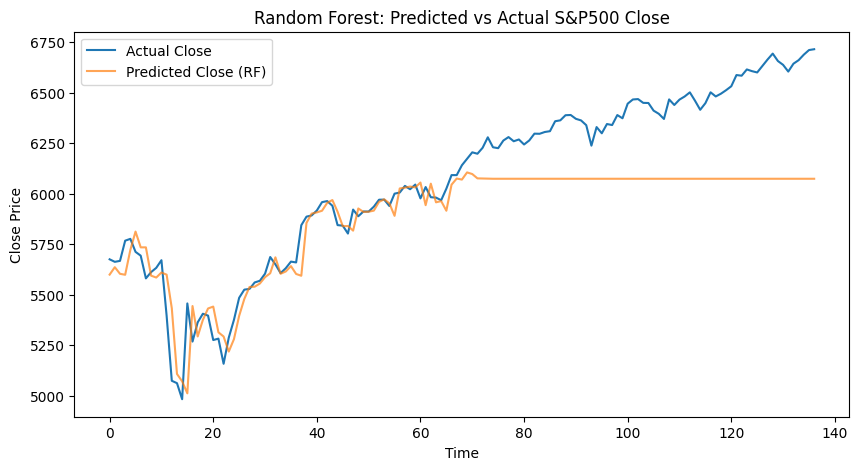

Random Forest RMSE: 280.14
Random Forest MAE: 208.79
Direction Accuracy (RF): 0.29
Cumulative Return (RF): -10.50%


In [23]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#I Create empty model
rf_model=RandomForestRegressor(
    n_estimators=600, #number of trees
    max_depth=8, #depth of each tree (number of questions in one tree)
    random_state=52 #seed
)
#II Train model
rf_model.fit(X_train, np.ravel(Y_train))

#III Predictions
y_pred_rf = rf_model.predict(X_test)

#IV Visualization
plt.figure(figsize=(10,5))
plt.plot(Y_test.values, label="Actual Close")
plt.plot(y_pred_rf, label="Predicted Close (RF)", alpha=0.7)
plt.title("Random Forest: Predicted vs Actual S&P500 Close")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

#V Evaluation
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
mae_rf = mean_absolute_error(Y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")

#VI Backtest
y_test_array = Y_test.values.flatten()
y_pred_array = y_pred_rf.flatten()


#calculates differences between consecutive values and converts them into direction (+1 up, -1 down, 0 no change)
Y_test_diff = np.sign(np.diff(y_test_array, prepend = y_test_array[0]))
Y_pred_diff = np.sign(np.diff(y_pred_array, prepend = y_pred_array[0]))

direction_acc_rf = accuracy_score(Y_test_diff, Y_pred_diff) #correct directions/all
print(f"Direction Accuracy (RF): {direction_acc_rf:.2f}")

signals = np.where(Y_pred_diff > 0, 1, -1)
diffs = np.diff(y_test_array)
prev = y_test_array[:-1] #no data in last element, that's why it's needed

returns_rf = diffs / prev #daily

# strategy_returns = signals * returns
# How it works:
# - Long (1) and positive return → profit
# - Long (1) and negative return → loss
# - Short (-1) and positive return → loss
# - Short (-1) and negative return → profit
strategy_returns_rf = signals[:-1] * returns_rf
cumulative_return_rf = np.cumprod(1+strategy_returns_rf)[-1]-1

print(f"Cumulative Return (RF): {cumulative_return_rf:.2%}")

#### Random Forest Results
The Random Forest model shows even weaker results in this setting. Although it initially manages to capture some local fluctuations, it quickly converges toward nearly constant predictions, failing to adapt to the sustained upward movement of the index. The performance metrics clearly reflect this limitation: RMSE (≈ 280.1) and MAE (≈ 208.8) are substantially worse than those of linear regression, the directional accuracy is very low at only 29.2%, and the backtested cumulative return drops further into negative territory (≈ –10.5%). This behavior confirms that tree-based ensemble methods, when restricted solely to lagged closing prices as input features, lack sufficient predictive power and tend to default to mean-reverting forecasts in the absence of exploitable patterns.

# Summary – Comparison of Models

Overall, the comparison between the two models reveals that even a simple lag-based linear regression, despite its systematic delay and limited forward-looking capability, provided more consistent alignment with the actual market trend than the more sophisticated Random Forest. While linear regression’s predictive power was modest, its lower error metrics and higher directional accuracy suggest that it retained some explanatory value of the time series structure. By contrast, Random Forest suffered from overfitting and failed to generalize, resulting in flat, uninformative forecasts and poor trading performance. These results underscore a key point: in financial time series with low autocorrelation in returns, model complexity does not necessarily translate into better predictive outcomes, and simpler parametric approaches may still outperform more advanced machine learning methods.


In [24]:
#Linear Regression
results_lr = {
    "Model": "Linear Regression",
    "RMSE": rmse_lr,
    "MAE": mae_lr,
    "Direction Accuracy": direction_acc_lr,
    "Cumulative Return": cumulative_return_lr
}

#Random Forest
results_rf = {
    "Model": "Random Forest",
    "RMSE": rmse_rf,
    "MAE": mae_rf,
    "Direction Accuracy": direction_acc_rf,
    "Cumulative Return": cumulative_return_rf
}

results_df = pd.DataFrame([results_lr, results_rf])

results_df["Cumulative Return"] = results_df["Cumulative Return"].map("{:.2%}".format)
results_df["Direction Accuracy"] = results_df["Direction Accuracy"].map("{:.2%}".format)
results_df["RMSE"] = results_df["RMSE"].round(2)
results_df["MAE"] = results_df["MAE"].round(2)

display(results_df)

,Model,RMSE,MAE,Direction Accuracy,Cumulative Return
0,Linear Regression,73.65,44.34,52.55%,-5.81%
1,Random Forest,280.14,208.79,29.20%,-10.50%
